<a href="https://colab.research.google.com/github/yihaozhong/479_data_management/blob/main/central_tendency_and_dispersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Central Tendency, Dispersion

## Central Tendency

Where is the data _centered_?

1. mean - sensitive to outliers (for instance, for income)
2. median
3. mode / frequency
4. quantile


### Frequency

Frequency - number of times a value appears in the dataset

Can be done with `dict` or `Counter`

In [ ]:
import numpy as np

# set up some data...

# kind of like rolling two six-sided dice
rolls = np.random.randint(1, 7, 1000) + np.random.randint(1, 7, 1000)
rolls

array([ 8,  5,  6,  6, 11, 10, 11,  8,  6,  7,  8,  7,  5, 10,  5,  7,  7,
        2,  3,  8,  7,  5,  7,  9,  8,  4, 11,  5,  4,  8,  2,  7,  6,  9,
        6, 10, 10,  9,  5, 10,  7,  8,  8,  7,  6,  7,  4,  7,  4,  5,  7,
        8, 11, 10,  9,  5, 10,  9, 12,  3,  7,  8,  7,  5,  4,  7,  7,  9,
        6, 10, 10, 12,  6, 10,  7,  8,  4,  4,  3, 10,  6,  5,  4,  7,  6,
        5,  3,  8, 10,  7,  8, 11,  7,  5,  7, 10,  6,  8, 10,  6,  4,  9,
        4, 12,  9, 11,  4,  5,  8,  6,  5,  6,  8,  3,  6,  7,  5,  5,  4,
        5, 11,  4,  6,  9,  6,  7,  7,  3,  7,  8,  7,  3, 10, 12,  6,  6,
       10,  9,  5,  3,  6,  5,  3,  7,  6,  3,  6,  5,  7,  5,  9, 11,  9,
        3,  9,  6, 10,  7,  8,  8,  5,  4,  6,  5, 12,  2, 11, 10,  6,  6,
        7,  4,  6,  4,  7,  4, 11, 11, 11, 11,  5,  8,  9,  8, 11, 10,  2,
        9, 10,  8,  4,  8,  6,  9,  8,  5,  5,  8,  9,  6, 12,  5,  7,  4,
        6,  9,  8, 11,  8,  9,  7, 11,  9,  9,  4,  7,  6,  3,  7,  8,  7,
        8,  2,  7,  4,  4

### Counting with a Dictionary

In [ ]:
counts = {}
for n in rolls:
   counts[n] = counts.get(n, 0)  + 1
   
counts

{2: 26,
 3: 57,
 4: 90,
 5: 102,
 6: 128,
 7: 163,
 8: 146,
 9: 94,
 10: 96,
 11: 75,
 12: 23}

In [ ]:
d={1:"hello", 2:"goodbye"}
d[1]


'hello'

In [ ]:
try:
  print(d[3])
except KeyError as e:
  print("KeyError:", e)  

KeyError: 3


In [ ]:
# also ... with try/except, in, update
counts = {}
for val in rolls:
    try:
        counts[val] += 1
    except:
        counts[val] = 1
print(counts)        

counts = {}
for val in rolls:
    if val in counts:
        counts[val] += 1
    else:
        counts[val] = 1
print(counts)        
        
counts = {}
for val in rolls:
    counts.update({val: counts.get(val, 0) + 1})
print(counts)        

{8: 146, 5: 102, 6: 128, 11: 75, 10: 96, 7: 163, 2: 26, 3: 57, 9: 94, 4: 90, 12: 23}
{8: 146, 5: 102, 6: 128, 11: 75, 10: 96, 7: 163, 2: 26, 3: 57, 9: 94, 4: 90, 12: 23}
{8: 146, 5: 102, 6: 128, 11: 75, 10: 96, 7: 163, 2: 26, 3: 57, 9: 94, 4: 90, 12: 23}


### Counting with Counter

Or, u no... you can just use a `Counter`. It's a sublcass of dictionary; you can pass it a list, and it'll count the items for you. Keys are _things_ you're counting, values are the actual counts.

In [ ]:
from collections import Counter
c = Counter(rolls)
c

Counter({2: 26,
         3: 57,
         4: 90,
         5: 102,
         6: 128,
         7: 163,
         8: 146,
         9: 94,
         10: 96,
         11: 75,
         12: 23})

In [ ]:
c.most_common()

[(7, 163),
 (8, 146),
 (6, 128),
 (5, 102),
 (10, 96),
 (9, 94),
 (4, 90),
 (11, 75),
 (3, 57),
 (2, 26),
 (12, 23)]

In [ ]:
c.most_common(2)

[(7, 163), (8, 146)]

### Mean, Median, and Mode

* mean: _average_ 
* median: "middle" value (half of the values fall under this)
* mode: most frequently occurring value

In [ ]:
mean = lambda data: sum(data) / len(data)

In [ ]:
def median(data):
    d = sorted(data)
    i = len(d) // 2
    # if even, mean of two middle values
    return d[i] if len(d) % 2 == 1 else mean(d[i-1: i+1])

In [ ]:
print(median([1, 2, 3, 5, 6, 7]))
print(median([2, 3, 5, 6, 7]))

4.0
5


In [ ]:
mode = lambda data: Counter(data).most_common(1)[0][0]

In [ ]:
mode(rolls)

7

In [ ]:
median(rolls)

7.0

In [ ]:
mean(rolls)

6.934

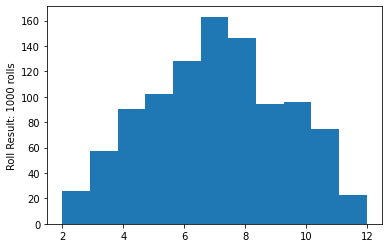

In [ ]:
# bonus! what does this data set of rolls actually _look_ like???
import numpy as np
from matplotlib import pyplot as plt
plt.hist(rolls, bins=(max(rolls) - min(rolls)+1))
plt.ylabel('Roll Result: 1000 rolls');

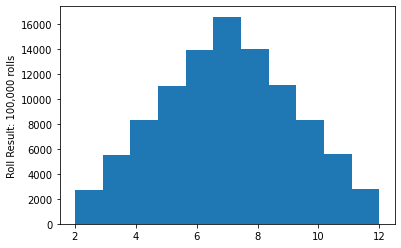

In [ ]:
rolls2 = np.random.randint(1, 7, 100000) + np.random.randint(1, 7, 100000)
plt.hist(rolls2, bins=(max(rolls2) - min(rolls2)+1))
plt.ylabel('Roll Result: 100,000 rolls');

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


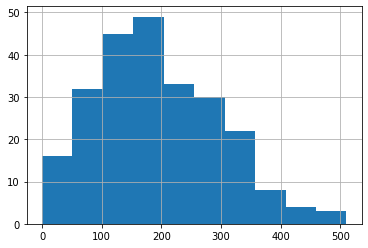

In [ ]:
import pandas as pd
starbucks=pd.read_csv('/content/drive/MyDrive/starbucks_drinkMenu_expanded.csv')
starbucks.Calories.hist()

In [ ]:
starbucks.Calories.describe()

count    242.000000
mean     193.871901
std      102.863303
min        0.000000
25%      120.000000
50%      185.000000
75%      260.000000
max      510.000000
Name: Calories, dtype: float64

### Percentile / 100-Quantile

Value under which some given percent of ordered data falls. (Common quantiles in use include percentiles, tertiles, quartiles, etc. ...)

In [ ]:
quantile = lambda p, data: sorted(data)[int(p * len(data))]

# we're using definition used in our book here which truncates the index
# ...but there are other methods of finding the index / actual value... such 
# as "nearest rank" (round up) and some sort of interpolation (which means
# value won't actually be in original set!)

In [ ]:
nums = [22, 12, 1, 5, 6, 2, 3, 20, 12, 8]
print(len(nums))
sorted(nums)

10


[1, 2, 3, 5, 6, 8, 12, 12, 20, 22]

In [ ]:
median(nums)

7.0

In [ ]:
# typically the 50th percentile is the median, but we truncated ...
quantile(0.50, nums)

8

In [ ]:
quantile(0.90, nums)

22

In [ ]:
quantile(0.30,nums )

5

In [ ]:
# numpy's percentile implementation agrees with our median calculation tho!
np.percentile(nums, 50)

7.0

## Dispersion


How _spread apart_ is the data?

1. variance
2. standard deviation - sensitive to outliers
    * mean absolute deviation also possible
3. middle 50% (interquartile range)


### range
* range of values... max and min again
* range is 0 if max and min are the same (no spread / data not dispersed... all points are the same!)
* larger range, obvs means min and max are far apart

... but that only describes max and min, what about all the other values?

### population variance 

* variance - describes variability or spread of distribution
* kind of like calculating difference from mean for all points, and getting the average of that
* but! instead of just the difference, we square the difference
* how to calculate variance:
  1. it's the average of the squared differences from the Mean
  2. calculate mean
  3. for every data point... subtract the mean and square the result .
  4. average of all differences (divide by number of data points)
  


In [ ]:
# assuming population variance (most libs will allow you to change this)
def variance(data):
    # for every number, subtract the mean, sq the result
    mu = mean(data)
    # sum of sq differences
    return sum((x - mu) ** 2 for x in data) / len(data)

In [ ]:
data = [600, 470, 170, 430, 300]
print(mean(data))
variance(data)

394.0


21704.0

In [ ]:
variance(rolls)

5.991839000000029

In [ ]:
np.var(rolls)

5.991839000000001

### population standard deviation  

* to get back to original units (rather than squares), use standard deviation.
    * calculate: square root of variance
    * can help describe how far away a value is from _normal_


In [ ]:
def standard_deviation(data):
    return variance(data) ** 0.5

In [ ]:
standard_deviation(data)

147.32277488562318

In [ ]:
np.std(data)

147.32277488562318

### Variance and Standard Deviation

* Why do we square???
  * A mix of negative and positive numbers will "cancel" out (we want to compare distance; remove sign)
  * magnifies extremes, though (good or bad?)
  * why not absolute value? yes, this is also a measure of dispersion
* population vs sample
  * for population, use n
  * sample... divide n - 1 rather than n so that we can have larger values 
  * using n for the sample ends up as an underestimate 
    * how to make larger? divide by smaller number, n - 1

### Interquartile Range 

Variance and standard deviation sensitive to outliers 

Another measure of dispersion that is not as sensitive to outliers is interquartile range

* use quantile to calculate value at 0.75
* use quantile to calculate value at 0.25


In [ ]:
# igr: Interquartile range
def iqr(data):
    return quantile(0.75, data) - quantile(0.25, data)

In [ ]:
rolls = np.random.randint(1, 7, 1000)
rolls[:100]

array([6, 5, 4, 5, 2, 6, 5, 2, 1, 1, 4, 2, 1, 5, 6, 1, 2, 6, 3, 6, 1, 5,
       5, 5, 6, 1, 3, 2, 2, 4, 5, 3, 6, 2, 5, 1, 1, 2, 6, 6, 4, 1, 3, 6,
       2, 6, 6, 4, 5, 4, 4, 2, 4, 6, 4, 4, 4, 3, 5, 3, 6, 2, 5, 4, 6, 1,
       5, 5, 1, 1, 4, 2, 4, 2, 4, 2, 3, 5, 4, 6, 1, 5, 5, 5, 1, 1, 4, 2,
       1, 6, 3, 4, 4, 1, 4, 3, 4, 6, 2, 1])

In [ ]:
mean(rolls)

3.638

In [ ]:
mode(rolls)

5

In [ ]:
variance(rolls)

2.7769560000000113

In [ ]:
standard_deviation(rolls)

1.6664201150970337

In [ ]:
quantile(0.75,rolls)

5

In [ ]:
quantile(0.25, rolls)

2

In [ ]:
iqr(rolls)

3

In [ ]:
median(rolls)

4.0

In [ ]:
np.median(rolls)

4.0

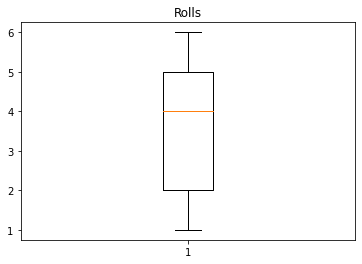

In [ ]:
# box plot shows quartiles and extremes
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.set_title("Rolls")
ax1.boxplot(rolls)
plt.show()

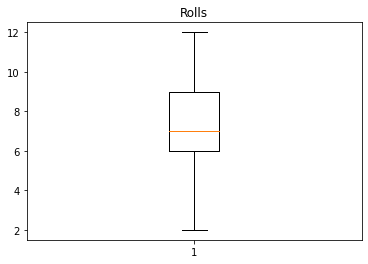

In [ ]:
rolls = np.random.randint(1, 7, 1000) + np.random.randint(1, 7, 1000)
fig1, ax1 = plt.subplots()
ax1.set_title("Rolls")
ax1.boxplot(rolls)
plt.show()


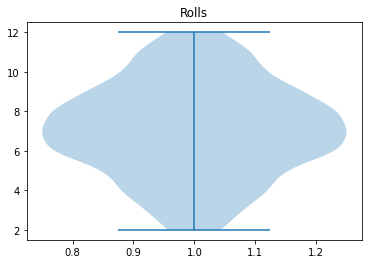

In [ ]:
# violinplot adds histogram, doesn't show quantiles, just extremes
fig1, ax1 = plt.subplots()
ax1.set_title("Rolls")
ax1.violinplot(rolls)
plt.show()